In [1]:
%load_ext autoreload
%autoreload 2

import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
from IPython.display import display
from PIL import Image
import ipywidgets as widgets


In [2]:
file = "/home/red-haired/Projects/comic-translation/data/aligned_jap/shokugeki_no_soma/31/2.png"

In [3]:
# Initialize some global variables
drawing = False # true if mouse is pressed
ix, iy = -1, -1 # initial position of the mouse
mask = None

# Mouse callback function for drawing
def draw_mask(event, x, y, flags, param):
    global ix, iy, drawing, mask
    
    # If the left mouse button is pressed, record the starting position
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y
    
    # While the mouse is moving and the left button is pressed, draw on the mask
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.line(mask, (ix, iy), (x, y), 255, 10) # draw a line on the mask
            ix, iy = x, y
    
    # Once the left mouse button is released, stop drawing
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        cv2.line(mask, (ix, iy), (x, y), 255, 10) # finalize the line

# Function to open an image
def load_image(file_path):
    global mask
    image = cv2.imread(file_path)[:512, :512]
    mask = np.zeros_like(image[:, :, 0])  # Initialize a black mask of the same size as the image
    return image

# Function to display the image and draw the mask
def interactive_drawing(image_path):
    global mask
    image = load_image(image_path)
    cv2.namedWindow('Image')
    cv2.setMouseCallback('Image', draw_mask)
    
    while True:
        display_img = image.copy()
        display_img[:, :, 0] = cv2.add(display_img[:, :, 0], mask)  # Add the mask to the image
        display_img[:, :, 1] = cv2.add(display_img[:, :, 1], mask)
        display_img[:, :, 2] = cv2.add(display_img[:, :, 2], mask)
        
        cv2.imshow('Image', display_img)
        
        if cv2.waitKey(1) & 0xFF == 27:  # Press ESC to close the window
            break
    
    cv2.destroyAllWindows()
    return mask

mask = interactive_drawing(file)


# # File selection widget
# file_picker = widgets.FileUpload(
#     accept='image/*',  # Accept only image files
#     multiple=False  # Single file upload
# )

# def on_upload(change):
#     for filename, file_info in change['new'].items():
#         image_data = Image.open(file_info['metadata']['name'])
#         image_data.save("uploaded_image.jpg")
#         binary_mask = interactive_drawing("uploaded_image.jpg")
        
#         # Display the final binary mask
#         plt.figure(figsize=(10, 10))
#         plt.imshow(binary_mask, cmap='gray')
#         plt.title('Binary Mask')
#         plt.axis('off')
#         plt.show()

# file_picker.observe(on_upload, names='value')
# display(file_picker)
print(mask.shape)
print(mask.dtype)


In [4]:
from comic.inpainting import Inpainter

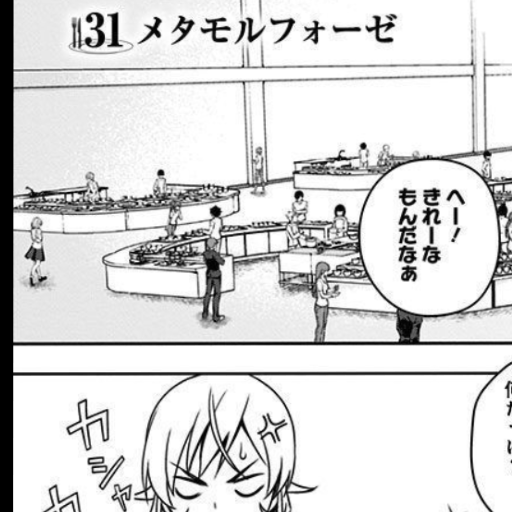

In [5]:
image = Image.open(file).convert("RGB").crop((0, 0, 512, 512))
display(image)

In [6]:
inpainter = Inpainter()
inpainted = inpainter.inpaint(image, mask)

/home/red-haired/Projects/comic-translation/venv/lib/python3.10/site-packages/diffusers/pipelines/pipeline_loading_utils.py:219: FutureWarning: You are loading the variant fp16 from stabilityai/stable-diffusion-2-inpainting via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(
vae/diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

An error occurred while trying to fetch /home/red-haired/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-inpainting/snapshots/76eb2c8bdc2cbaf387603cbae34884c254a05e80/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /home/red-haired/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-inpainting/snapshots/76eb2c8bdc2cbaf387603cbae34884c254a05e80/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
/home/red-haired/Projects/comic-translation/venv/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/home/red-haired/Projects/comic-translation/venv/lib/python3.10/site-packa

  0%|          | 0/25 [00:00<?, ?it/s]

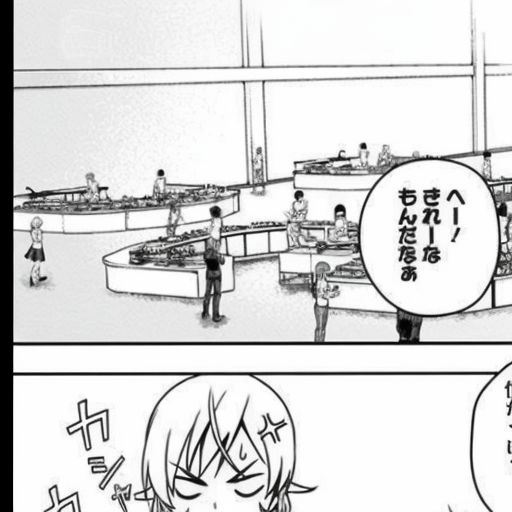

In [7]:
display(inpainted)